In [1]:
import numpy as np
import matplotlib.pyplot as plt
import causallearn
from causallearn.utils.cit import *
from causallearn.graph.GraphClass import CausalGraph
import pandas as pd
from itertools import combinations, permutations
from numpy import ndarray
from typing import Dict, List, Tuple
from causallearn.utils.cit import fisherz
import random
import time

import scipy as sp

# Initialize Dataset (Sample num_traj trajectories of length T)

In [2]:
beta = 0.6
num_states = 50
num_inputs = 20
num_outputs = 25

A = np.random.normal(0,1, (num_states, num_states))
B = np.ones((num_states, num_inputs)) * beta
C = np.random.normal(0,1, (num_outputs, num_states))
T = 2
num_traj = 20000
# num_traj = 10000

for traj_id in range(num_traj):
    x_vec = np.zeros((num_states, T))
    y_vec = np.zeros((num_outputs, T))
    x_vec[:, 0] = np.random.randn(num_states)
    y_vec[:, 0] = C @ x_vec[:, 0]
    
    u_vec = np.random.randn(num_inputs, T)
    #w_vec = np.random.randn(2,T) * np.sqrt(1 - alpha**2 - beta**2)
    
    for t in range(T-1):
    #     print(t)
        x_vec[:, t+1] = A @ x_vec[:, t] + B @ u_vec[:,t] #+ w_vec[:, t]
        y_vec[:, t+1] = C @ x_vec[:, t+1]
    
    y_u_vec = np.block([[y_vec], [u_vec]])
    
    if traj_id == 0:
        traj_dataset = np.zeros((num_traj, y_u_vec.shape[0], y_u_vec.shape[1]))
        traj_dataset[0, :, :] = y_u_vec
    else:
        traj_dataset[traj_id, :, :] = y_u_vec


In [3]:
# plt.plot(traj_dataset)
traj_dataset.shape

(20000, 45, 2)

In [4]:
assert traj_dataset.shape == (num_traj, num_outputs + num_inputs, T)

In [5]:
num_traj, num_quantities, _ = traj_dataset.shape
# num_quantities

# Modified PC Algorithm for Learning Number of Inputs

In [6]:
def correlation_test(data, m, rho_m):
    num_traj, num_quantities, _ = data.shape
    input_indices = []
    
    for i in range(num_quantities):
        node_indices_to_test = np.random.choice(num_quantities, m)
        for count, j in enumerate(node_indices_to_test):
            corr = sp.stats.pearsonr(traj_dataset[:, j, 0], traj_dataset[:, i, 1])[0]
            if corr >= rho_m:
                break
            if count == m-1:
                input_indices.append(i)
    
    return input_indices


In [7]:
begin_time = time.time()

m_list = [2*x + 2 for x in list(range(10))]
rho_min_list = [x * 0.01 + 0.01 for x in list(range(5))]
input_indices_true = list(range(num_outputs, num_outputs + num_inputs))
num_trials = 10

false_positive_avg_array = np.zeros((len(m_list), len(rho_min_list)))
missed_detection_avg_array = np.zeros((len(m_list), len(rho_min_list)))

for count_m, m in enumerate(m_list):
    print("\n")
    print("count_m:", count_m)
    for count_rho, rho_min in enumerate(rho_min_list):
        print("count_rho", count_rho)
        false_positive_quantity_list = []
        missed_detection_quantity_list = []
        for trial_id in range(num_trials):
            input_indices_est = correlation_test(traj_dataset, m, rho_min)
            false_positive_quantity_list.append(len([k for k in input_indices_est if k not in input_indices_true]))
            missed_detection_quantity_list.append(len([k for k in input_indices_true if k not in input_indices_est]))
        false_positive_avg_array[count_m, count_rho] = sum(false_positive_quantity_list)/len(false_positive_quantity_list)
        missed_detection_avg_array[count_m, count_rho] = sum(missed_detection_quantity_list)/len(missed_detection_quantity_list)

end_time = time.time()
print("\nTime:", end_time - begin_time)

# print(correlation_test(traj_dataset, 10, 0.05))





count_m: 0
count_rho 0
count_rho 1
count_rho 2
count_rho 3
count_rho 4


count_m: 1
count_rho 0
count_rho 1
count_rho 2
count_rho 3
count_rho 4


count_m: 2
count_rho 0
count_rho 1
count_rho 2
count_rho 3
count_rho 4


count_m: 3
count_rho 0
count_rho 1
count_rho 2
count_rho 3
count_rho 4


count_m: 4
count_rho 0
count_rho 1
count_rho 2
count_rho 3
count_rho 4


count_m: 5
count_rho 0
count_rho 1
count_rho 2
count_rho 3
count_rho 4


count_m: 6
count_rho 0
count_rho 1
count_rho 2
count_rho 3
count_rho 4


count_m: 7
count_rho 0
count_rho 1
count_rho 2
count_rho 3
count_rho 4


count_m: 8
count_rho 0
count_rho 1
count_rho 2
count_rho 3
count_rho 4


count_m: 9
count_rho 0
count_rho 1
count_rho 2
count_rho 3
count_rho 4

Time: 227.55092000961304


In [75]:
# input_indices_est

In [8]:
print(false_positive_avg_array)
print(missed_detection_avg_array)

[[ 8.8  8.2 10.3 11.7 12.2]
 [ 3.5  4.6  5.   6.2  6.1]
 [ 2.5  2.9  2.7  4.   4.4]
 [ 0.7  2.1  1.4  2.   3. ]
 [ 0.5  0.6  1.   1.2  1.9]
 [ 0.4  0.4  0.7  0.9  1.2]
 [ 0.2  0.1  0.   0.2  0.8]
 [ 0.   0.   0.2  0.6  1. ]
 [ 0.   0.   0.1  0.2  0.3]
 [ 0.   0.   0.   0.   0.2]]
[[ 2.8  0.   0.   0.   0. ]
 [ 5.6  0.7  0.   0.   0. ]
 [ 7.2  0.3  0.   0.   0. ]
 [ 7.8  0.4  0.   0.   0. ]
 [10.8  0.3  0.   0.   0. ]
 [11.6  0.7  0.   0.   0. ]
 [12.9  0.7  0.   0.   0. ]
 [12.9  0.9  0.   0.   0. ]
 [14.3  0.6  0.   0.   0. ]
 [15.   1.2  0.   0.   0. ]]


In [9]:
m = 20
rho_min = 0.02

# for i in range(num_quantities):
#     print("\ni:", i)
#     for j in range(num_quantities):
#         print("j:", j, "corr:", sp.stats.pearsonr(traj_dataset[:, j, 0], traj_dataset[:, i, 1])[0])

# print(traj_dataset[:, 10, 0])
# print(traj_dataset[:, 15, 1])

correlation_test(traj_dataset, m, rho_min)


[25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44]

Text(0.5, 1.0, 'False Positive Rate')

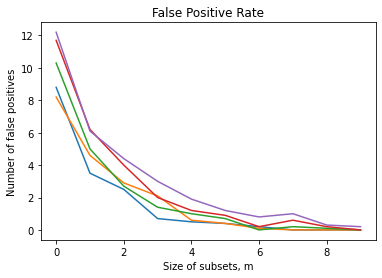

In [10]:
plt.plot(false_positive_avg_array)
plt.xlabel('Size of subsets, m')
plt.ylabel('Number of false positives')
plt.title('False Positive Rate')

Text(0.5, 1.0, 'Missed Detection Rate')

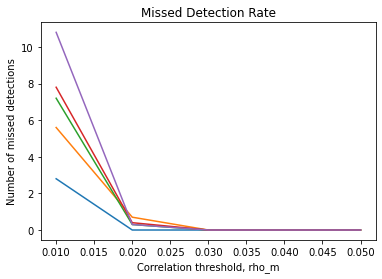

In [41]:
for i in range(missed_detection_avg_array.shape[1]):
    plt.plot(rho_min_list, missed_detection_avg_array[i,:])
plt.xlabel('Correlation threshold, rho_m')
plt.ylabel('Number of missed detections')
plt.title('Missed Detection Rate')

In [37]:
missed_detection_avg_array.shape[1]

5

In [12]:
# Save results:

path_directory = "/Users/ksk/Desktop/"

path_file = path_directory + "false_positive_avg_array.csv"
false_positive_avg_array_pd = pd.DataFrame(false_positive_avg_array)
false_positive_avg_array_pd.to_csv(path_file, index=False)

path_file = path_directory + "missed_detection_avg_array.csv"
missed_detection_avg_array_pd = pd.DataFrame(missed_detection_avg_array)
missed_detection_avg_array_pd.to_csv(path_file, index=False)



# Kshitij's algorithms:

In [ ]:
def compute_sample_corr(data,i,j, num_samples):
    avg_t_plus = (1/num_samples)*data[:,i].sum()
    avg_t = (1/num_samples)*data[:,j].sum()
    diff_t_plus = data[:, i] - avg_t_plus
    diff_t = data[:,j] - avg_t_plus
    diff_t_plus_sq = (diff_t_plus**2).sum()
    diff_t_sq = (diff_t**2).sum()
    corr = (np.dot(diff_t_plus, diff_t))/np.sqrt((diff_t_plus_sq*diff_t_sq))
    return corr

def modified_pc(data, m, num_samples, num_observations, rho_m):
    input_set = []
    for i in range(data.shape[1]):
        subset = np.array(random.sample(list(range(data.shape[1])), m))
        for j in subset:
            rho_m_hat = compute_sample_corr(data, i,j, num_samples)
            if abs(rho_m_hat) >= 0.5*rho_m:
                break 
            if j == subset[-1]:
                input_set.append(i)
    return input_set




# Scratch Work

In [ ]:
# list_1 = [3, 4, 5]
# list_2 = [4, 5, 6]

# list_1_not_2 = [k for k in list_1 if k not in list_2]
# list_2_not_1 = [k for k in list_2 if k not in list_1]